<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Worksheet (17)</h1>
<h2 style="color:#800080;text-align:center;">Hierarchical Clustering</h2>

<h3 b> Introduction </h3>

In the following practical worksheet, you will learn how to use the hierarchical clustering algorithm. If you have any questions please ask for assistance during the session and you can also email me if you have any further questions <u> alaa.mohasseb@port.ac.uk</u>. 

<u>Dataset</u>

Mall Customers dataset will be used for the prediction of different customers using k-Mean Clustering. The Dataset contains five attributes and 200 instances. The attributes are Customer ID, Gender (male/female), the Age which is between 19 to 70 of different customers, Annual Income and Spending Score.  (Download the dataset from your moodle page).

The <i>objective of the clustering</i> is to create a group of clusters and label them based on the customers' spending habits the Annual Income and Spending Score will be used as features as they are the best factors to determine the segments of a customer.

<u>Import the Libraries</u>

In a new Jupyter Notebook (practWeek16), load the NumPy, pandas and matplotlib libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
#this will make your plot outputs appear and be stored within the notebook

<u>Read External Data</u> (Mall dataset)
<ul>
<li>Download the dataset from your moodle page.</li>
<li>Upload the dataset to your Jupyter dashboard.</li>
<li>To read an external data (csv file) use the following command:</li>
</ul>

In [2]:
dataset=pd.read_csv('mallcustomers.csv')
X=dataset.iloc[:, [3,4]].values

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<u>Data understanding and Exploration</u>

To understand the dataset, analysis should be done and some information needs to be explored such as:

- The Attributes
- Data Shape
- Data Description
- Data Information
- Data Type

In [4]:
dataset.keys() #Print the attributes

Index([u'CustomerID', u'Genre', u'Age', u'Annual Income (k$)',
       u'Spending Score (1-100)'],
      dtype='object')

In [5]:
dataset.describe() #Data description

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
dataset.dtypes #Data Type

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<u>Find the optimal number of clusters</u>

Using the dendrogram to visualize and find the optimal number of clusters.

Note: If we draw a horizontal line that passes through longest distance without crossing any horizontal line we get 5 clusters as shown in the following figure:

In [7]:
# plot the denogram 
import scipy.cluster.hierarchy as sch

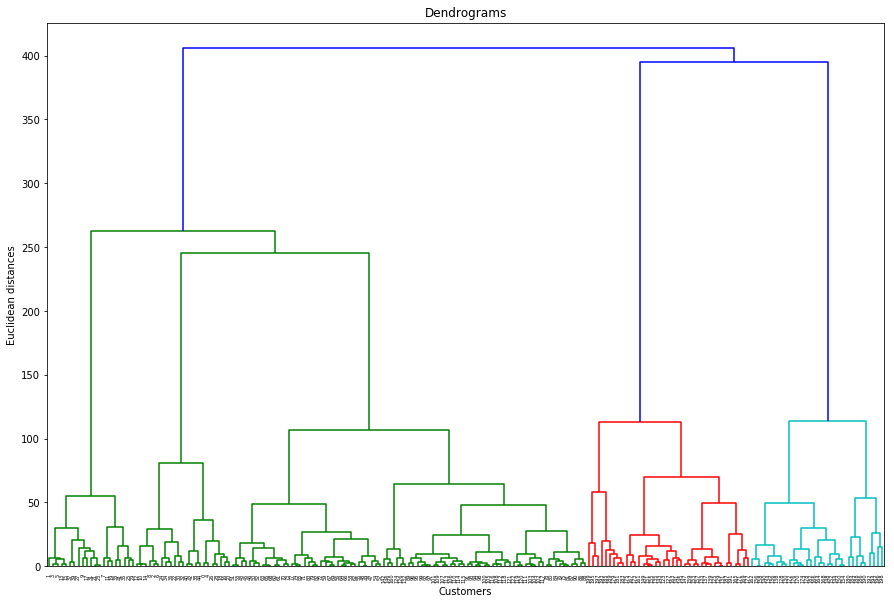

In [16]:
#dendrogram using ward method 
plt.figure(figsize=(15, 10)) 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendrograms") 
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<u>Build the Machine learning Model</u>

<b>Hierarchical Clustering</b>

Apply Hierarchical Clustering to dataset and Visualising the Clusters.

In [11]:
# import the agglomerative/hierarchical cluster from scikit learn 
from sklearn.cluster import AgglomerativeClustering

In [12]:
# init the model
hc= AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [13]:
# fit and predict 
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

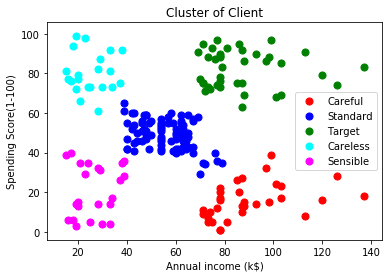

In [15]:
# Visualizing the  Cluster
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=50, c='magenta', label = 'Sensible')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

<u>Assign the clusters group</li>

In [16]:
from pandas import Series, DataFrame
dataset['cluster group'] = Series(y_hc, index=dataset.index)
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


In [17]:
# print number of instances in each cluster group
dataset['cluster group'].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: cluster group, dtype: int64